In [61]:
from tensorflow import keras
from data_load import load_netcdf
from models import data_prep, compile_and_fit
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Reshape

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = load_netcdf('C:/Studia/maciej-romanski/data/gaj_olawski')

c:\Studia\maciej-romanski\data_load.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(netCDF2df(path+'/'+filename),ignore_index=True)


In [3]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='windspeed_10')

In [79]:
rng = np.random.RandomState(1)
X = np.linspace(0, 100, y_train.shape[0])[:, np.newaxis]
y = 2+np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])


In [82]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(y.reshape(-1,1))
y = scaler.transform(y.reshape(-1,1))
y_train = y[:int(0.7*len(y))]
y_test = y[int(0.7*len(y)):]

In [87]:
def split_X_y(data, look_back = 1, pred_forward = 1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-pred_forward):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back + pred_forward -1 , 0])
    return np.array(dataX), np.array(dataY).reshape((len(dataY),1))

X_train, y_train = split_X_y(y_train, look_back=24, pred_forward=6)
X_test, y_test = split_X_y(y_test, look_back=24, pred_forward=6)   

In [97]:
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(X_train.shape[1],1)),
            Dense(units=24, activation='relu'),
            Dense(units=24, activation='relu'),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])

compile_and_fit(model, X_train, y_train)

Epoch 1/20
1341/1341 [==============================] - 3s 1ms/step - loss: 0.0034
Epoch 2/20
1341/1341 [==============================] - 2s 1ms/step - loss: 0.0016
Epoch 3/20
1341/1341 [==============================] - 2s 1ms/step - loss: 0.0013
Epoch 4/20
1341/1341 [==============================] - 2s 1ms/step - loss: 0.0011
Epoch 5/20
1341/1341 [==============================] - 2s 1ms/step - loss: 9.1678e-04
Epoch 6/20
1341/1341 [==============================] - 2s 1ms/step - loss: 7.9416e-04
Epoch 7/20
1341/1341 [==============================] - 2s 1ms/step - loss: 7.4708e-04
Epoch 8/20
1341/1341 [==============================] - 2s 1ms/step - loss: 7.3457e-04
Epoch 9/20
1341/1341 [==============================] - 2s 1ms/step - loss: 7.2026e-04
Epoch 10/20
1341/1341 [==============================] - 2s 1ms/step - loss: 7.0729e-04
Epoch 11/20
1341/1341 [==============================] - 2s 1ms/step - loss: 6.9899e-04
Epoch 12/20
1341/1341 [==============================] - 

In [98]:
predictions = model.predict(X_test)

574/574 [==============================] - 1s 1ms/step


In [99]:
X_test_debug = X_test*0.5
predictions_debug = model.predict(X_test_debug)

574/574 [==============================] - 1s 1ms/step


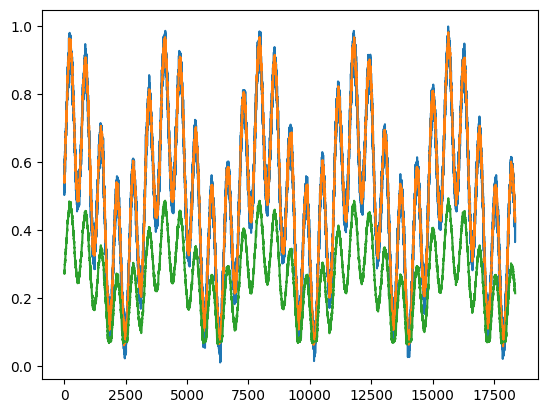

In [100]:
plt.plot(y_test)
plt.plot(predictions)
plt.plot(predictions_debug)